# **Import thư viện**

In [1]:
from email import header
import math
import numpy as np
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt
import pandas as pd
import csv 


# **Visualize kết quả CCA bằng đồ thị**





In [2]:
# tìm mô hình hồi quy
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  

In [3]:
def plot_regression_line(x, y, beta,a,b,corr): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "b", marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = beta[0] + beta[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
    
    aStr = [format(ai,'.2f') for ai in a]
    bStr = [format(bi,'.2f') for bi in b]
    
    _title = "Canonical coefficients: $a_1$ = ("+",".join(aStr)+"), $b_1$ = ("+",".join(bStr)+")" \
            + "\nCanonical correlation coefficient is " + str(corr)#format(corr,'.5f')
    # putting labels 
    plt.suptitle(_title)
    plt.xlabel("Canonical variate $U_1$")
    plt.ylabel("Canonical variate $V_1$")
  
    # function to show plot 
    plt.show() 


In [4]:
def VisualizedCCAresult(x,y,a,b,corr):
    
    # trả về hệ số hồi quy tuyến tính giữa x và y
    beta = estimate_coef(x, y) 
  
    # vẽ đường thẳng hồi quy, 
    # và thông báo vecto a,c cùng hệ số tương quan
    plot_regression_line(x, y,beta,a,b,corr) 


# **Cài đặt CCA**

In [5]:
def CCA(x1,x2):
#   input x1(nxp), x2(nxq)
    #Bước 1
    #tính trung bình
    meanX1 = x1.mean(0)
    meanX2 = x2.mean(0)
    #chuyển vị X1,X2 sang (pxn),(qxn) để dễ xử lí
    x1T = x1.transpose()
    x2T = x2.transpose()
    #tính n,p,q
    n = len(x1)
    p = len(x1[0])
    q = len(x2[0])
    #chuẩn hóa
    for i in range(p):
        dev = math.sqrt(np.cov(x1T[i]))
        for j in range(n):
            x1T[i][j] = float(x1T[i][j] - meanX1[i])/(dev)
    for i in range(q):
        dev = math.sqrt(np.cov(x2T[i]))
        x2T[i] = (x2T[i]-meanX2[i])/dev
        #for j in range(n):
         #   x2T[i][j] = (x2T[i][j] - meanX2[i])/dev
    #đặt z1,z2 là biến đã chuẩn hóa
    z1,z2 = x1T,x2T
    #z1,z2=x1.transpose(),x2.transpose()
    #B2: tính ma trận MMT với z1(pxn), 
    # z2(qxn) là biến đã chuẩn hóa và p<=q
    #ma trận covariance
    cov = np.cov(z1,z2)
    #print(cov)
    cov11 = cov[:p,:p]
    cov12 = cov[:p,p:]
    cov21 = cov12.transpose()
    cov22 = cov[p:,p:]
    cov22_1 = np.linalg.inv(cov22)
    
    #căn của ma trận cov11
    sqrt = sqrtm(cov11)
    #lấy nghịch đảo
    sqrtCov11_1 = np.linalg.inv(sqrt)
    #tính mmT
    mmT = sqrtCov11_1.dot(cov12)
    mmT = mmT.dot(cov22_1)
    mmT = mmT.dot(cov21)
    mmT = mmT.dot(sqrtCov11_1)
    #B3,B4: tìm trị riêng và vecto riêng của mmT
    lamda,f = np.linalg.eig(mmT)
    
    #ma trận hệ số a
    a = sqrtCov11_1.dot(f)
    #ma trận hệ số b
    b_commer = (cov22_1.dot(cov21)).dot(a)
    bT = b_commer.transpose()
    #chuẩn hóa để phương sai = 1
    for i in range(len(bT)):
        #bT[i] là vecto nằm ngang
        t = bT[i].dot(cov22)
        t = t.dot(bT[i].transpose())
        bT[i] = bT[i]/math.sqrt(t)

    b = bT.transpose()
    #a chuyển vị
    aT = a.transpose()
    #tính U,V, hệ số tương quan aT(pxp) x z1T(pxn)
    U = aT.dot(z1)
    V = bT.dot(z2)
    #hệ số tương quan
    corr = np.sqrt(lamda)
    #visualized cặp biến chính tắc thứ nhất
    VisualizedCCAresult(U[0],V[0],aT[0],bT[0],corr[0])
    return a,b,U,V,corr


# **Tải data từ github**

In [6]:
!git clone https://github.com/ThanhHung2610/DemoCCAData

fatal: destination path 'DemoCCAData' already exists and is not an empty directory.


In [7]:
cd DemoCCAData

/content/DemoCCAData


# **Demo với dữ liệu đã tải**

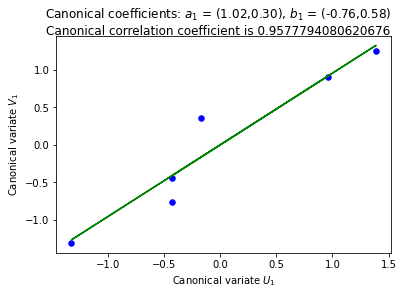

In [8]:
#demo
with open('data1.csv','r') as f:
    dt1 = csv.reader(f)
    x = []
    header = next(dt1)
    for row in dt1:
        x.append(row)
x1 = np.array(x,dtype = np.float64)
with open('data2.csv','r') as f:    
    dt2 = csv.reader(f)
    x = []
    header = next(dt2)
    for row in dt2:
        x.append(row)
x2 = np.array(x,dtype = np.float64)



a,b,u,v,c = CCA(x1,x2)